
## Detectron2 is Facebooks new vision library 




In [1]:
#!pip install pyyaml==5.1
!pip show pyyaml  


Name: PyYAML
Version: 5.1
Summary: YAML parser and emitter for Python
Home-page: https://github.com/yaml/pyyaml
Author: Kirill Simonov
Author-email: xi@resolvent.net
License: MIT
Location: c:\users\lenovo\anaconda3\envs\myenv\lib\site-packages
Requires: 
Required-by: dask


In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
#!nvidia-smi
!nvcc --version #10.1
!python --version # 3.7.6

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:12:52_Pacific_Daylight_Time_2019
Cuda compilation tools, release 10.1, V10.1.243
Python 3.7.6


In [4]:
# CPU Only
#conda install pytorch==1.8.0 torchvision==0.9.0 torchaudio==0.8.0 cpuonly -c pytorch

# CUDA 10.1
#!conda install pytorch==1.8.0 torchvision==0.9.0 torchaudio==0.8.0 cudatoolkit=10.1 -c pytorch

#!pip3 install torch==1.8.0 torchvision==0.9.0 -f https://download.pytorch.org/whl/cu101/torch_stable.html

#!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html


In [5]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.8.1+cpu False


## Other Requirements

1. fvcore: pip install git+https://github.com/facebookresearch/fvcore

2. pycocotools: pip install cython; pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI



In [6]:
# or install like this
#!git clone https://github.com/facebookresearch/detectron2.git


In [7]:
%cd detectron2

D:\1-pipelined_topics\Detectron\detectron2


In [8]:
#!python setup.py build develop

Inference with pre-trained model

Using a pre-trained model is super easy in Detectron2. You only need to load in a config and some weights and then create a DefaultPredictor. After that you can simply make predictions and display them using Detectron's Visualizer utility.

In [2]:
# import some common detectron2 utilities
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2


# get image
im = cv2.imread("test.png")
im1 = cv2.imread("cat1.jpeg")

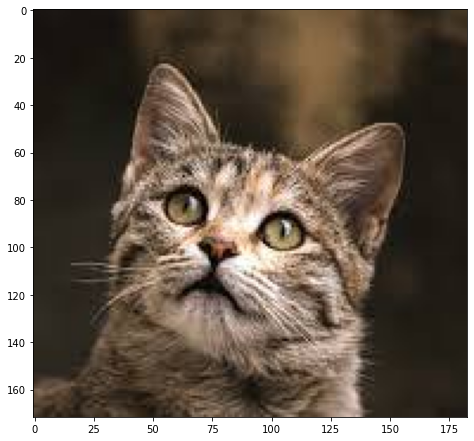

In [3]:
#Show the image with matplotlib
#from IPython.display import Image
#Image('../download.jpg')

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7.5))
plt.imshow(im1[..., ::-1]) #bgr to rgb

In [4]:
# Create config
cfg = get_cfg()
cfg.merge_from_file("configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"


In [5]:
# Create predictor

# If getting AssertionError: Torch not compiled with CUDA enabled detectron2. Then do the below given line
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)

In [6]:
outputs = predictor(im1)

C:\Users\admin\anaconda3\lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([15])
Boxes(tensor([[  1.2950,  21.6750, 158.0678, 169.8662]]))


<Figure size 720x360 with 0 Axes>

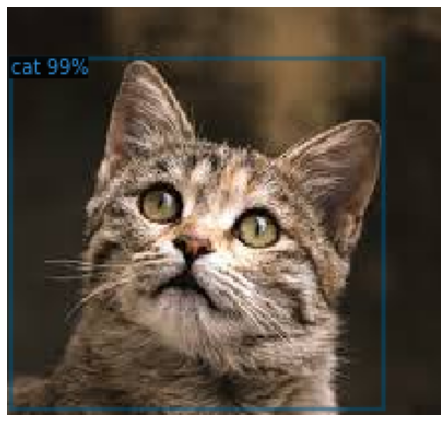

In [8]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im1[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25,7.5)), plt.imshow(im), plt.axis('off');
plt.figure(figsize=(10,5))

cv2_imshow(out.get_image()[:, :, ::-1])


## keypoint detection  : detecting people and localizing their keypoints.

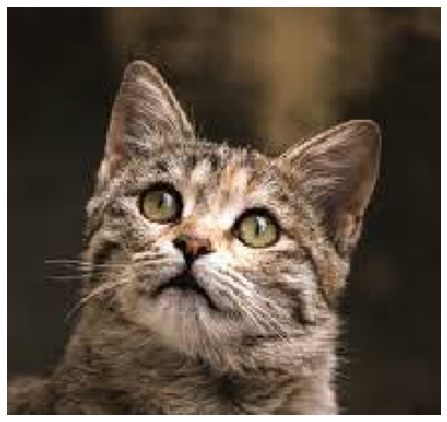

In [11]:
from detectron2 import model_zoo

# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config
cfg.MODEL.DEVICE = "cpu"

cfg.merge_from_file("configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")

im = cv2.imread("cat1.jpeg")

def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25,7.5)), plt.imshow(im), plt.axis('off');

predictor = DefaultPredictor(cfg)
outputs = predictor(im1)

v = Visualizer(im1[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

## Panoptic segmentation model

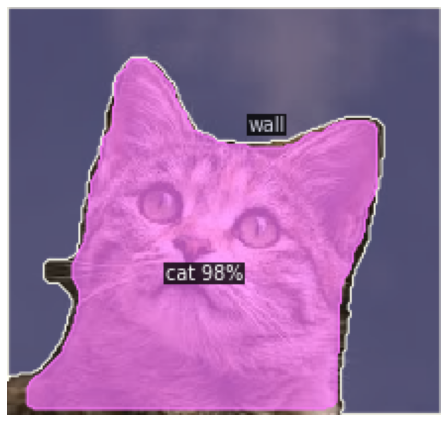

In [12]:

cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"

cfg.merge_from_file("configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")

predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]

v = Visualizer(im1[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])

# Image Segmentation

In [13]:
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file("configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [14]:
# get image
im1 = cv2.imread("cat1.jpeg")

In [15]:
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)

In [20]:
outputs = predictor(im1)

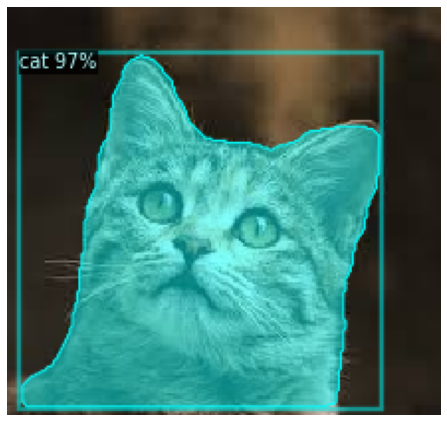

In [16]:

v = Visualizer(im1[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])